In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory('C:/Plantology/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 140590 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory('C:/Plantology/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

RuntimeError: Physical devices cannot be modified after being initialized

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
4394/4394 [==============================] - 180s 39ms/step - loss: 0.9213 - accuracy: 0.7247 - val_loss: 0.3193 - val_accuracy: 0.8971
Epoch 2/10
4394/4394 [==============================] - 175s 40ms/step - loss: 0.2263 - accuracy: 0.9274 - val_loss: 0.2286 - val_accuracy: 0.9267
Epoch 3/10
4394/4394 [==============================] - 180s 41ms/step - loss: 0.1233 - accuracy: 0.9598 - val_loss: 0.1231 - val_accuracy: 0.9602
Epoch 4/10
4394/4394 [==============================] - 178s 41ms/step - loss: 0.0806 - accuracy: 0.9739 - val_loss: 0.1154 - val_accuracy: 0.9646
Epoch 5/10
4394/4394 [==============================] - 177s 40ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.1122 - val_accuracy: 0.9664
Epoch 6/10
4394/4394 [==============================] - 184s 42ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.1005 - val_accuracy: 0.9719
Epoch 7/10
4394/4394 [==============================] - 180s 41ms/step - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0

In [18]:
#  ACCURACY OF TRAINING
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

4394/4394 [==============================] - 86s 20ms/step - loss: 0.0103 - accuracy: 0.9970
Training accuracy: 0.9969556927680969


In [19]:
# TEST ACCURESSY
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


1099/1099 [==============================] - 15s 13ms/step - loss: 0.1005 - accuracy: 0.9737
Validation accuracy: 0.9736512899398804


In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
cnn.save('C:/Plantology/trained_plant_disease_model.keras')

In [22]:
training_history.history

{'loss': [0.9212639331817627,
  0.22626210749149323,
  0.12327098846435547,
  0.08058276027441025,
  0.060803867876529694,
  0.04711580649018288,
  0.04182380065321922,
  0.03426039218902588,
  0.030761076137423515,
  0.02745654061436653],
 'accuracy': [0.7247315049171448,
  0.9274414777755737,
  0.9597979784011841,
  0.9739384055137634,
  0.9801835417747498,
  0.9850345253944397,
  0.9868482947349548,
  0.9891812801361084,
  0.9904474020004272,
  0.9919410943984985],
 'val_loss': [0.3192940652370453,
  0.22859902679920197,
  0.12305641919374466,
  0.11540301889181137,
  0.1122361347079277,
  0.10049361735582352,
  0.08526864647865295,
  0.12555751204490662,
  0.08862582594156265,
  0.10050763189792633],
 'val_accuracy': [0.8971090316772461,
  0.926701545715332,
  0.9602208137512207,
  0.9646027684211731,
  0.9664238691329956,
  0.9718871116638184,
  0.9774072170257568,
  0.9651718735694885,
  0.9753016233444214,
  0.9736512899398804]}

In [23]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# RUN MODEL ON INPUT
validation_set = tf.keras.utils.image_dataset_from_directory('C:/Coding/HackFest_Galacticos/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 35144 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [24]:
import tensorflow as tf

# Load the saved model without compiling it
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras', compile=False)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Compile the loaded model with the defined optimizer
cnn.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Summary of the loaded model
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

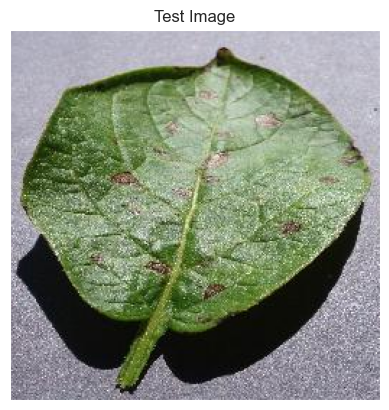

In [6]:
# testing on user input

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#Test Image Visualization
import cv2
image_path = 'C:/Coding/HackFest_Galacticos/Test_Images/AppleScab3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 126ms/step


In [8]:
#print(predictions)

[[5.04046596e-11 3.92044865e-17 1.21618272e-15 7.71942596e-14
  1.63149564e-17 4.45904317e-15 1.81739406e-17 4.30459073e-16
  5.32433581e-13 1.14824915e-20 1.66233692e-23 1.60034617e-20
  2.97591460e-19 3.79928026e-16 2.12154311e-23 6.88924321e-17
  3.34926293e-15 5.50941781e-23 8.85445162e-10 1.30366904e-15
  1.00000000e+00 4.66827098e-11 9.94955054e-15 2.31996879e-21
  5.17487862e-19 1.27211796e-18 6.70158068e-16 5.15349006e-17
  3.84903166e-20 9.64231039e-12 4.85452553e-13 1.49132062e-15
  1.51715064e-11 1.34193633e-22 5.01530400e-18 5.25889364e-21
  4.29781519e-23 1.26011689e-16]]


In [9]:
result_index = np.argmax(predictions) #Return index of max element
#print(result_index)

20


Potato___Early_blight


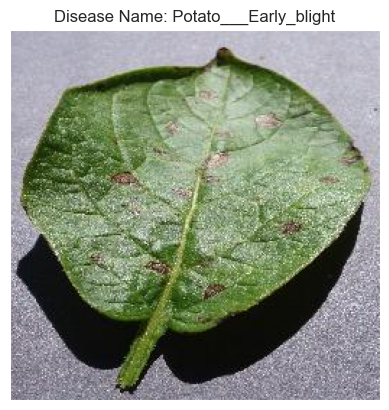

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
#print(class_name[result_index])
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
import pandas as pd
import cv2 as cv


url = "C:/Coding/HackFest_Galacticos/treatment.csv"
df = pd.read_csv(url)

def get_disease_info(disease_name):
    # Check if the disease name exists in the dataframe
    if disease_name in df['DISEASE_NAME'].values:
        # Filter the dataframe for the specified disease
        disease_info = df[df['DISEASE_NAME'] == disease_name].iloc[0]
        cause = disease_info['CAUSE']
        cure = disease_info['CURE']
        medicine = disease_info['MEDICINE']
        why = disease_info['WHY']
        if 'healthy'in disease_name :
            print(f"Name: {disease_name}")
            print(f"maintance: {cure}")
        else:
            print(f"Disease name: {disease_name}")
            print(f"Cause: {cause}")
            print(f"Cure/treatment: {cure}")
            print(f"Medication: {medicine}")
            print(f"Why: {why}")
    else:
        print("Disease not found.")

# Get user input for disease name
disease_name = class_name[result_index]

# Call the function to retrieve information
get_disease_info(disease_name)


Disease name: Potato___Early_blight
Cause: Fungus (Alternaria solani)
Cure/treatment: Apply fungicides preventively, practice crop rotation, and remove infected plant debris.
Medication: Mancozeb
Why: Mancozeb is a fungicide commonly used to control early blight in potatoes. It works by inhibiting fungal cell respiration and can be applied preventively or curatively. Again, follow the manufacturer's instructions for proper application.


1/1 [==============================] - 0s 30ms/step
Disease name: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Cause: Virus (Tomato yellow leaf curl virus)
Cure/treatment: Control whitefly populations, plant resistant tomato varieties, and remove infected plants.
Medication: no specific medication or cure
Why: no information


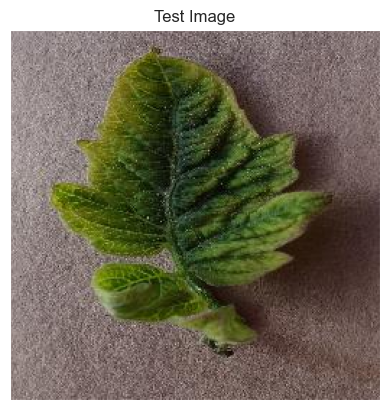

In [12]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import cv2

#Test Image Visualization

image_path = 'C:/Coding/HackFest_Galacticos/Dataset/test/test/TomatoYellowCurlVirus1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
#plt.show()

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions)

url = "C:/Coding/HackFest_Galacticos/treatment.csv"
df = pd.read_csv(url)

def get_disease_info(disease_name):
    # Check if the disease name exists in the dataframe
    if disease_name in df['DISEASE_NAME'].values:
        # Filter the dataframe for the specified disease
        disease_info = df[df['DISEASE_NAME'] == disease_name].iloc[0]
        cause = disease_info['CAUSE']
        cure = disease_info['CURE']
        medicine = disease_info['MEDICINE']
        why = disease_info['WHY']
        if 'healthy'in disease_name :
            print(f"Name: {disease_name}")
            print(f"maintance: {cure}")
        else:
            print(f"Disease name: {disease_name}")
            print(f"Cause: {cause}")
            print(f"Cure/treatment: {cure}")
            print(f"Medication: {medicine}")
            print(f"Why: {why}")
    else:
        print("Disease not found.")

# Get user input for disease name
disease_name = class_name[result_index]

# Call the function to retrieve information
get_disease_info(disease_name)